# Name: Utsav Patidar

# The Sparks Foundation - Student Marks Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours.- Linear Regression

### What will be predicted score if a student studies for 8.00 hrs/ day?

### What will be predicted score if a student studies for 9.25 hrs/ day?

* Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

* Importing Dataset

In [2]:
data = pd.read_csv("student_scores - student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
data.shape

(25, 2)

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot the Graph-For Analysis

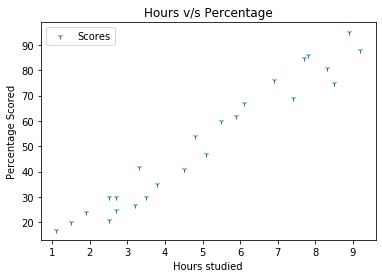

In [8]:
data.plot(x='Hours',y='Scores',style='1')
plt.title("Hours v/s Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.show()

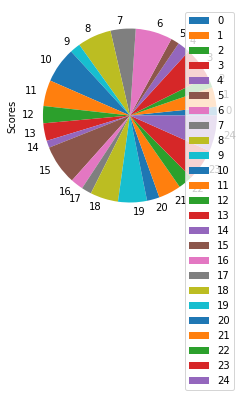

In [9]:
data.plot.pie(x='Hours',y='Scores')

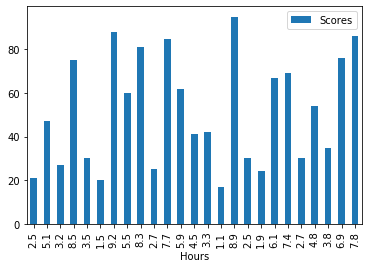

In [10]:
data.plot.bar(x='Hours',y='Scores')

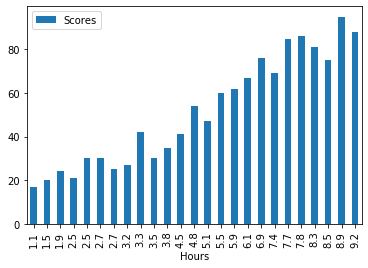

In [11]:
data.sort_values(['Hours'], axis=0,ascending=True,inplace=True)
data.head(10)
data.plot.bar(x='Hours',y='Scores')

# Prepare the data for our Model

In [12]:
X = data.iloc[:, :-1].values   # Hours
y = data.iloc[:,1].values      # Scores
print(X)
print(y)

[[1.1]
 [1.5]
 [1.9]
 [2.5]
 [2.5]
 [2.7]
 [2.7]
 [3.2]
 [3.3]
 [3.5]
 [3.8]
 [4.5]
 [4.8]
 [5.1]
 [5.5]
 [5.9]
 [6.1]
 [6.9]
 [7.4]
 [7.7]
 [7.8]
 [8.3]
 [8.5]
 [8.9]
 [9.2]]
[17 20 24 21 30 30 25 27 42 30 35 41 54 47 60 62 67 76 69 85 86 81 75 95
 88]


Divide our data into Train and Test for Training and Testing our model

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Training the model - Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our model is ready for testing

In [15]:
print(X_test)
print("Prediction of Scores")
y_pred = regressor.predict(X_test)
print(y_pred)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]
Prediction of Scores
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [16]:
data_table = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data_table

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


In [17]:
hours = [[8.00]]
pred = regressor.predict(hours)
print("Predicted score if a student studies for 8.00 hrs/ day:",pred)

Predicted score if a student studies for 8.00 hrs/ day: [79.82685217]


In [18]:
hours = [[9.25]]
pred = regressor.predict(hours)
print("Predicted score if a student studies for 9.25 hrs/ day:",pred)

Predicted score if a student studies for 9.25 hrs/ day: [91.90447898]


# Evaluating the model

In [19]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.621333622532769
